---

## Project Purpose    
 
The goal of this mid-semester project is to work with Twitter API to analyze tweets from a person, and in this case, Former President Donald Trump.  @RealDonaldTrump tweets provide a great opportunity to understand how online media can be used to communicate over the traditional media. In fact, social media post are so influential, now the traditional media spends considerable amount of time discussing social media posts. Tweets from people like Donald Trump and Elon Musk have become so consequential, they can move the stock market on short term and get network TV to debate and discuss hours and hours about what Trump or Musk meant.

We hope this project will be fun as we can analyze range of emotions, hope, controversy, vagueness that are part of Trump tweets. We are interested in seeing what conclusions you can draw from former US Presidents tweets. 
* DISCLAIMER: This project is not designed with any bias in mind. Note that we can pick any person (Hillary Clinton or Donald Trump or Elon Musk) or anyone else to do the same analysis. We hope your analysis is objective, independent of any political bias you may have. As Data Scientists, it is our responsiblity to do independent analysis of the data we try to understand. You should follow data and interpret insights w/o any bias.

## Set up
Let us get all the libaries initialized as necessary

In [1]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import json

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

In [2]:
pip install tweepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 6.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
## Make sure you have set up tweepy if you are working locally.
# https://www.pythoncentral.io/introduction-to-tweepy-twitter-for-python/
# After set up, the following should run:
import tweepy

## PART 2 - Working with Twitter Data (group/individual)
The json file in data folder contains some loaded tweets from @RutgersU and @realdonaldtrump. Run the folllowing code and read and understand and what it does. Groups must download the latest tweets from @RutgersU using tweepy (and call that). Individuals can use the given file.

In [6]:
from pathlib import Path
import json

ds_tweets_save_path = "RutgersU_recent_tweets.json"   # need to get this file

# Guarding against attempts to download the data multiple
# times:
#if not Path(ds_tweets_save_path).is_file():
    # Getting as many recent tweets by @RutgersU as Twitter will let us have.
    # We use tweet_mode='extended' so that Twitter gives us full 280 character tweets.
    # This was a change introduced in September 2017.
    
    # The tweepy Cursor API actually returns "sophisticated" Status objects but we 
    # will use the basic Python dictionaries stored in the _json field. 
   # example_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, screen_name="RutgersU", 
                                             #tweet_mode='extended').items()]
    
    # Saving the tweets to a json file on disk for future analysis
   # with open(ds_tweets_save_path, "w") as f:        
       # json.dump(example_tweets, f)

# Re-loading the json file:
#with open(ds_tweets_save_path, "r") as f:
    #example_tweets = json.load(f)
    
with open(ds_tweets_save_path, "r") as f:
    example_tweets = json.load(f)

### Task 2.1 - First 10 Tweets

If things ran as expected, you should be able to look at the first tweet by running the code below. It probabably does not make sense to view all tweets in a notebook, as size of the tweets can freeze your browser (always a good idea to press ctrl-S to save the latest, in case you have to restart Jupyter)

In [7]:
# Looking at one tweet object, which has type Status: 
from pprint import pprint # ...to get a more easily-readable view.
pprint(example_tweets[0])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sat Nov 02 23:02:49 +0000 2019',
 'display_text_range': [0, 140],
 'entities': {'hashtags': [{'indices': [22, 31], 'text': 'internet'}],
              'symbols': [],
              'urls': [],
              'user_mentions': [{'id': 955836661702774784,
                                 'id_str': '955836661702774784',
                                 'indices': [3, 13],
                                 'name': 'Rutgers University–New Brunswick',
                                 'screen_name': 'RutgersNB'},
                                {'id': 52517689,
                                 'id_str': '52517689',
                                 'indices': [42, 58],
                                 'name': 'Rutgers School of Communication and '
                                         'Information',
                                 'screen_name': 'RutgersCommInfo'},
                                {'id': 392737670,
                   

In [8]:
num_tweets = len(example_tweets)
print(f"The number of tweets in the JSON file is: {num_tweets}")

The number of tweets in the JSON file is: 3237


In [9]:
# print the first 50 tweets from the cached file
for index, tweet in enumerate(example_tweets[:50], start=1):
    tweet_text = tweet['full_text']
    tweet_date = tweet['created_at']
    print(f"Tweet {index} (Date: {tweet_date}):\n{tweet_text}\n{'-'*50}")

Tweet 1 (Date: Sat Nov 02 23:02:49 +0000 2019):
RT @RutgersNB: As the #internet turns 50, @RutgersCommInfo's @MaryChayko focuses on how we have used the innovation and what it has meant f…
--------------------------------------------------
Tweet 2 (Date: Sat Nov 02 23:01:52 +0000 2019):
RT @RutgersNB: According to U.S. Rep. @FrankPallone, "continuous pharmaceutical manufacturing is the future of medicine." Now, new legislat…
--------------------------------------------------
Tweet 3 (Date: Sat Nov 02 22:58:30 +0000 2019):
RT @RutgersLaw: The 34th Annual Mary Philbrook Public Interest Award Celebration honored Lloyd Freeman RLAW'07 (@Esquire1911), Partner and…
--------------------------------------------------
Tweet 4 (Date: Sat Nov 02 22:58:12 +0000 2019):
RT @prccrutgers: We will be holding our 4th Annual MLK Oratorical Competition in January 2020. You must write &amp; recite an original speech c…
--------------------------------------------------
Tweet 5 (Date: Fri Nov 01 21:45:07 +0

### Task 2.2 - processing tweets
To be consistent we are going to use the same dataset no matter what you get from your twitter api. So from this point on, if you are working as a group or individually, be sure to use the data sets provided to you in the srv/shared" folder. One of the files is 'TrumpTweets_1.json', the other one is 'TrumpTweets_2.json'. First load TrumpTweets_1.

In [10]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets will be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    with open(path, "rb") as f:
        import json
        return json.load(f)

In [12]:
dest_path = "TrumpTweets_1.json"
trump_tweets = load_tweets(dest_path)

In [13]:
# print the first 10 Trump tweets
for index, tweet in enumerate(trump_tweets[:10], start=1):
    tweet_text = tweet['full_text']
    tweet_date = tweet['created_at']
    print(f"Tweet {index} (Date: {tweet_date}):\n{tweet_text}\n{'-'*50}")

Tweet 1 (Date: Tue Oct 16 16:22:11 +0000 2018):
REGISTER TO https://t.co/0pWiwCHGbh! #MAGA🇺🇸 https://t.co/ACTMe53TZU
--------------------------------------------------
Tweet 2 (Date: Tue Oct 16 16:18:08 +0000 2018):
RT @WhiteHouse: https://t.co/RNqLpOtS3O
--------------------------------------------------
Tweet 3 (Date: Tue Oct 16 15:26:33 +0000 2018):
Is it really possible that Bruce Ohr, whose wife Nellie was paid by Simpson and GPS Fusion for work done on the Fake Dossier, and who was used as a Pawn in this whole SCAM (WITCH HUNT), is still working for the Department of Justice????? Can this really be so?????
--------------------------------------------------
Tweet 4 (Date: Tue Oct 16 15:18:51 +0000 2018):
“Conflict between Glen Simpson’s testimony to another House Panel about his contact with Justice Department official Bruce Ohr. Ohr was used by Simpson and Steele as a Back Channel to get (FAKE) Dossier to FBI. Simpson pleading Fifth.” Catherine Herridge. Where is Jeff Sessions?
-

### Task 2.3 - Oldest Tweet

Find the number of the month of the oldest tweet.

In [14]:
# Find the number of the month of the oldest tweet (e.g. 1 for January)
trump_tweets = pd.DataFrame(trump_tweets)
date_format = "%a %b %d %H:%M:%S %z %Y"
    
### BEGIN ANSWER
def oldest_tweet(df):
    df['created_at'] = pd.to_datetime(df['created_at'], format=date_format)
    oldest_tweet_index = df['created_at'].idxmin()
    oldest_tweet = df.loc[oldest_tweet_index]
    oldest_month = df.loc[oldest_tweet_index, 'created_at'].strftime('%B')
    return oldest_month
### END ANSWER

oldest_month = oldest_tweet(trump_tweets)
print(oldest_month)

October


## PART 3  Twitter Source Analysis (group/individual)



### Task 3.1 - Merging dataframes

Merge the two dataframes created from TrumpTweets_1 and TrumpTweets_2. Call this new dataframe all_tweets

In [16]:
dest_path3 = "TrumpTweets_3.json"
trump_tweets3 = load_tweets(dest_path3)
trump_tweets3 = pd.DataFrame(trump_tweets3)
trump_tweets3['created_at'] = pd.to_datetime(trump_tweets3['created_at'], format=date_format)

In [19]:
### BEGIN ANSWER
dest_path2 = "TrumpTweets_2.json"
trump_tweets2 = load_tweets(dest_path2)
trump_tweets2 = pd.DataFrame(trump_tweets2)
trump_tweets2['created_at'] = pd.to_datetime(trump_tweets2['created_at'], format=date_format)

dest_path3 = "TrumpTweets_3.json"
trump_tweets3 = load_tweets(dest_path3)
trump_tweets3 = pd.DataFrame(trump_tweets3)
trump_tweets3['created_at'] = pd.to_datetime(trump_tweets3['created_at'], format=date_format)

all_tweets = pd.concat([trump_tweets, trump_tweets2, trump_tweets3], join='outer', ignore_index=True)

### END ANSWER
all_tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status,text,is_retweet
0,2018-10-16 16:22:11+00:00,1052233253040640001,1052233253040640001,REGISTER TO https://t.co/0pWiwCHGbh! #MAGA🇺🇸 https://t.co/ACTMe53TZU,False,"[0, 44]","{'hashtags': [{'text': 'MAGA', 'indices': [37, 42]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/0pWiwCHGbh', 'expanded_url': 'http://Vote.GOP', 'display_url': 'Vote.GOP', 'indices': [12, 35]}, {'url': 'https://t.co/ACTMe53TZU', 'expanded_url': 'https:...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,5415,16565,False,False,False,en,NaN,NaN,NaN,NaN
1,2018-10-16 16:18:08+00:00,1052232230972678145,1052232230972678145,RT @WhiteHouse: https://t.co/RNqLpOtS3O,False,"[0, 39]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'WhiteHouse', 'name': 'The White House', 'id': 822215673812119553, 'id_str': '822215673812119553', 'indices': [3, 14]}], 'urls': [], 'media': [{'id': 1052215563894763522, 'id_str': '1052215563894763522', 'indic...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,4478,0,False,False,False,und,"{'media': [{'id': 1052215563894763522, 'id_str': '1052215563894763522', 'indices': [16, 39], 'media_url': 'http://pbs.twimg.com/amplify_video_thumb/1052215563894763522/img/9FMSOYwUL-RDMGVT.jpg', 'media_url_https': 'https://pbs.twimg.com/amplify_video_thumb/1052215563894763522...","{'created_at': 'Tue Oct 16 15:14:16 +0000 2018', 'id': 1052216160706420737, 'id_str': '1052216160706420737', 'full_text': 'https://t.co/RNqLpOtS3O', 'truncated': False, 'display_text_range': [0, 0], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], ...",NaN,NaN
2,2018-10-16 15:26:33+00:00,1052219253384994816,1052219253384994816,"Is it really possible that Bruce Ohr, whose wife Nellie was paid by Simpson and GPS Fusion for work done on the Fake Dossier, and who was used as a Pawn in this whole SCAM (WITCH HUNT), is still working for the Department of Justice????? Can this really be so?????",False,"[0, 264]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,13103,41253,False,False,NaN,en,NaN,NaN,NaN,NaN
3,2018-10-16 15:18:51+00:00,1052217314463100928,1052217314463100928,“Conflict between Glen Simpson’s testimony to another House Panel about his contact with Justice Department official Bruce Ohr. Ohr was used by Simpson and Steele as a Back Channel to get (FAKE) Dossier to FBI. Simpson pleading Fifth.” Catherine Herridge. Where is Jeff Sessions?,False,"[0, 279]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.052184e+18,1052184484941049857,...,6271,20251,False,False,NaN,en,NaN,NaN,NaN,NaN
4,2018-10-16 15:04:32+00:00,1052213711295930368,1052213711295930368,"“Federal Judge throws out Stormy Danials lawsuit versus Trump. Trump is entitled to full legal fees.” @FoxNews Great, now I can go after Horseface and her 3rd rate lawyer in the Great State of Texas. She will confirm the letter she signed! She knows nothing about me, a total ...",False,"[0, 280]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'FoxNews', 'name': 'Fox News', 'id': 1367531, 'id_str': '1367531', 'indices': [102, 110]}], 'urls': []}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,...,14594,54635,False,False,NaN,en,NaN,NaN,NaN,NaN


### Task 3.2 - tweet times
Construct a DataFrame called `df_trump` containing all the tweets stored in `all_tweets`. 
**Important:** There may/will be some overlap so be sure to __eliminate duplicate tweets__. If you do not eliminate the duplicates properly, your results might not be compatible with the test solution. **Hint:** the `id` of a tweet is always unique.

The index of the dataframe should be the ID of each tweet (looks something like `907698529606541312`). It should have these columns:

- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text`: The text of the tweet.
- `retweet_count`: The retweet count of the tweet.
- `favorite_count`: The favorite count of the tweet.

Finally, **the resulting dataframe should be sorted by date/time.**

**Warning:** *Some tweets may store the text in the `text` field and other will use the `full_text` field.*

In [20]:
# merged dataframe sorted by date/time (earliet tweet first)

### BEGIN ANSWER
all_tweets['full_text'] = all_tweets['full_text'].fillna(all_tweets['text'])
all_tweets['id'] = pd.to_numeric(all_tweets['id'], errors='coerce')
df_trump = all_tweets.drop_duplicates(subset='id', keep='first')
df_trump.set_index('id', inplace=True)
selected_columns = ['created_at', 'source', 'full_text', 'retweet_count', 'favorite_count']
df_trump = df_trump[selected_columns]

column_mapping = {'created_at': 'time', 'full_text': 'text'}
df_trump = df_trump.rename(columns=column_mapping)
### END ANSWER

In the following questions, we are going to find out the charateristics of Trump tweets and the devices used for the tweets.

First let's examine the source field:

In [21]:
df_trump['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>',
       'Twitter for iPhone', 'Twitter Web Client', 'Media Studio',
       'Twitter Ads', 'Twitter for Android', 'Periscope',
       'Twitter for iPad', 'TweetDeck', 'Instagram', 'Mobile Web (M5)'],
      dtype=object)

### Task 3.3 - HTML tags

Remove the HTML tags from the source text field. 

**Hint:** Use `df_trump['source'].str.replace` and your favorite regular expression.

In [22]:
import re
### BEGIN ANSWER
def clean_source(html_string):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', html_string)

df_trump['source'] = df_trump['source'].apply(clean_source)
# Print the cleaned DataFrame
#print(df)
### END ANSWER

#### Question. What is the most common device used for Trump tweets? Make a plot to find out the most common device types used 
Sort the plot in decreasing order of the most common device type

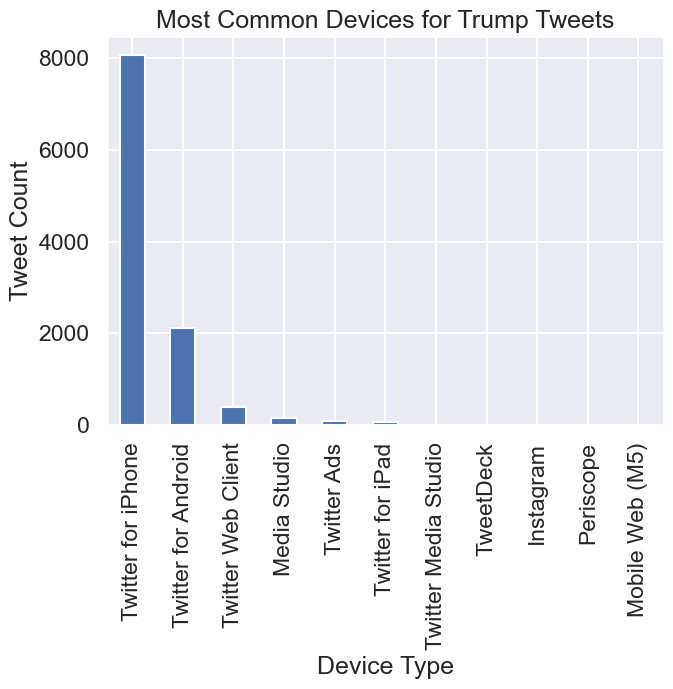

Twitter for iPhone      8071
Twitter for Android     2116
Twitter Web Client       395
Media Studio             157
Twitter Ads               96
Twitter for iPad          60
Twitter Media Studio      12
TweetDeck                  2
Instagram                  2
Periscope                  1
Mobile Web (M5)            1
Name: source, dtype: int64


In [23]:
### BEGIN ANSWER
import matplotlib.pyplot as plt

device_counts = df_trump['source'].value_counts()

device_counts.plot(kind='bar')

plt.xlabel('Device Type')
plt.ylabel('Tweet Count')
plt.title('Most Common Devices for Trump Tweets')

plt.show()

print(device_counts)
### END ANSWER

### Task 3.4 - Devices
Is there a difference between his Tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets) (notice the `+0000` in the first few tweets)

**Note** - If your `time` column is not in datetime format, the following code will not work.

In [24]:
df_trump['time'][0:3]

id
1052233253040640001   2018-10-16 16:22:11+00:00
1052232230972678145   2018-10-16 16:18:08+00:00
1052219253384994816   2018-10-16 15:26:33+00:00
Name: time, dtype: datetime64[ns, UTC]

We'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [25]:
df_trump['est_time'] = (
    df_trump['time'] # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
df_trump.head()

,time,source,text,retweet_count,favorite_count,est_time
id,,,,,,
1052233253040640001,2018-10-16 16:22:11+00:00,Twitter for iPhone,REGISTER TO https://t.co/0pWiwCHGbh! #MAGA🇺🇸 https://t.co/ACTMe53TZU,5415,16565,2018-10-16 11:22:11-05:00
1052232230972678145,2018-10-16 16:18:08+00:00,Twitter for iPhone,RT @WhiteHouse: https://t.co/RNqLpOtS3O,4478,0,2018-10-16 11:18:08-05:00
1052219253384994816,2018-10-16 15:26:33+00:00,Twitter for iPhone,"Is it really possible that Bruce Ohr, whose wife Nellie was paid by Simpson and GPS Fusion for work done on the Fake Dossier, and who was used as a Pawn in this whole SCAM (WITCH HUNT), is still working for the Department of Justice????? Can this really be so?????",13103,41253,2018-10-16 10:26:33-05:00
1052217314463100928,2018-10-16 15:18:51+00:00,Twitter for iPhone,“Conflict between Glen Simpson’s testimony to another House Panel about his contact with Justice Department official Bruce Ohr. Ohr was used by Simpson and Steele as a Back Channel to get (FAKE) Dossier to FBI. Simpson pleading Fifth.” Catherine Herridge. Where is Jeff Sessions?,6271,20251,2018-10-16 10:18:51-05:00
1052213711295930368,2018-10-16 15:04:32+00:00,Twitter for iPhone,"“Federal Judge throws out Stormy Danials lawsuit versus Trump. Trump is entitled to full legal fees.” @FoxNews Great, now I can go after Horseface and her 3rd rate lawyer in the Great State of Texas. She will confirm the letter she signed! She knows nothing about me, a total ...",14594,54635,2018-10-16 10:04:32-05:00


**What you need to do:**

Add a column called `hour` to the `df_trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$

In [26]:
df_trump['hour'] = df_trump['est_time'].dt.hour + df_trump['est_time'].dt.minute/60 + df_trump['est_time'].dt.second/(60**2)
# Write your code here
# a new column that contains the rounded hour
df_trump['roundhour']=round(df_trump['hour'])
df_trump.head()

,time,source,text,retweet_count,favorite_count,est_time,hour,roundhour
id,,,,,,,,
1052233253040640001,2018-10-16 16:22:11+00:00,Twitter for iPhone,REGISTER TO https://t.co/0pWiwCHGbh! #MAGA🇺🇸 https://t.co/ACTMe53TZU,5415,16565,2018-10-16 11:22:11-05:00,11.369722,11.0
1052232230972678145,2018-10-16 16:18:08+00:00,Twitter for iPhone,RT @WhiteHouse: https://t.co/RNqLpOtS3O,4478,0,2018-10-16 11:18:08-05:00,11.302222,11.0
1052219253384994816,2018-10-16 15:26:33+00:00,Twitter for iPhone,"Is it really possible that Bruce Ohr, whose wife Nellie was paid by Simpson and GPS Fusion for work done on the Fake Dossier, and who was used as a Pawn in this whole SCAM (WITCH HUNT), is still working for the Department of Justice????? Can this really be so?????",13103,41253,2018-10-16 10:26:33-05:00,10.442500,10.0
1052217314463100928,2018-10-16 15:18:51+00:00,Twitter for iPhone,“Conflict between Glen Simpson’s testimony to another House Panel about his contact with Justice Department official Bruce Ohr. Ohr was used by Simpson and Steele as a Back Channel to get (FAKE) Dossier to FBI. Simpson pleading Fifth.” Catherine Herridge. Where is Jeff Sessions?,6271,20251,2018-10-16 10:18:51-05:00,10.314167,10.0
1052213711295930368,2018-10-16 15:04:32+00:00,Twitter for iPhone,"“Federal Judge throws out Stormy Danials lawsuit versus Trump. Trump is entitled to full legal fees.” @FoxNews Great, now I can go after Horseface and her 3rd rate lawyer in the Great State of Texas. She will confirm the letter she signed! She knows nothing about me, a total ...",14594,54635,2018-10-16 10:04:32-05:00,10.075556,10.0


Use the `roundhour` column and plot the number of tweets at every hour of the day.
Order the plot using the hour of the day (1 to 24). Use seaborn `countplot`

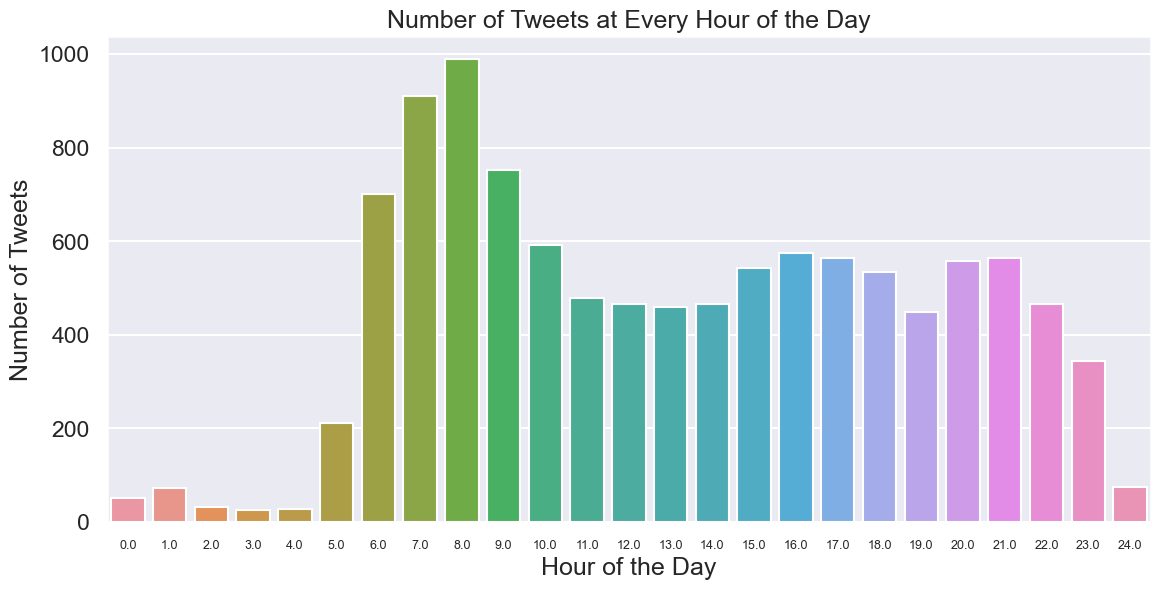

In [27]:
# make a bar plot here
### BEGIN ANSWER
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='roundhour', data=df_trump)
plt.title('Number of Tweets at Every Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.xticks(fontsize=9)
plt.show()

### END ANSWER

Now, use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following.

<img src="images/device_hour2.png" align="left" alt="Drawing" style="width: 400px;"/>


/Users/dinesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/dinesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


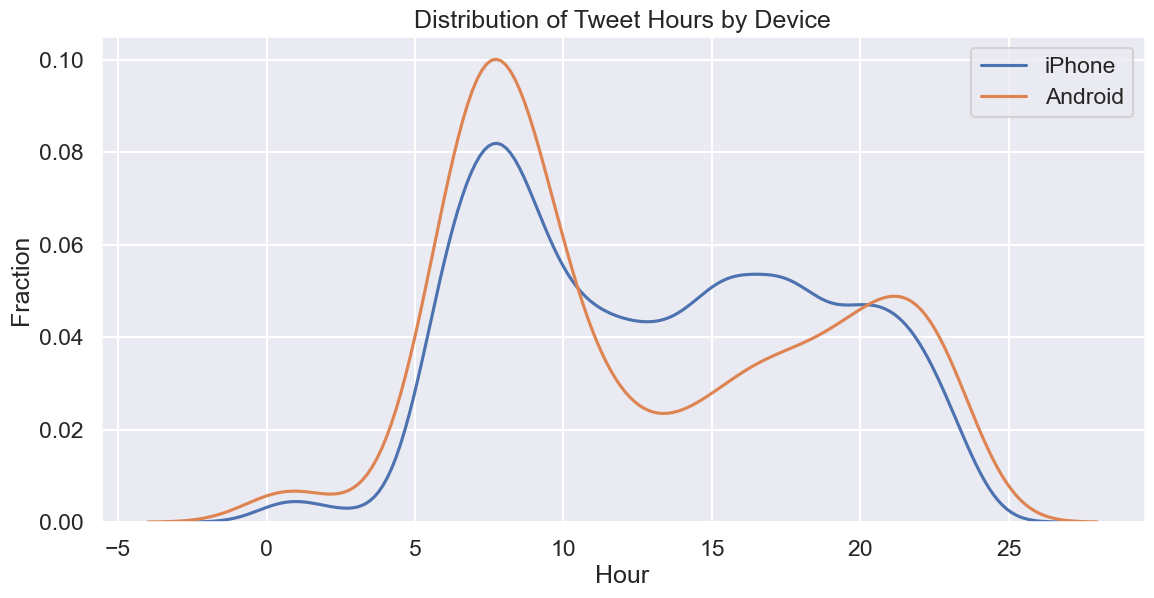

In [28]:
### BEGIN ANSWER
iphone_tweets = df_trump[df_trump['source'] == 'Twitter for iPhone']
android_tweets = df_trump[df_trump['source'] == 'Twitter for Android']

# Plot the distribution for the two devices
plt.figure(figsize=(12, 6))
sns.distplot(iphone_tweets['hour'], label='iPhone', hist=False)
sns.distplot(android_tweets['hour'], label='Android', hist=False)

plt.title('Distribution of Tweet Hours by Device')
plt.xlabel('Hour')
plt.ylabel('Fraction')
plt.legend()

plt.show()
    # your solution here

### END ANSWER

### Task 3.5 iPhone or Android

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Create a figure identical to your figure from 3.4, except that you should show the results only from 2016. If you get stuck consider looking at the `year_fraction` function from the next problem.

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 

During the campaign, it was theorized that Donald Trump's tweets from Android were written by him personally, and the tweets from iPhone were from his staff. Does your figure give support the theory?

**Your Response**: 


In 2016, the time allocation for the usage of the iphone centered in the afternoon, while his tweets from 2015 to present shows that he mostly tweets in the morning. Because there is a very distinct difference in usage based on time between the iPhone and Android tweets, this supports the idea that iPhone tweets were from his staff. Because the Android tweets are mostly written in the morning, it aligns with the idea of personal tweeting.  

\\
<img src="images/device_hour2.png" align="left" alt="Drawing" style="width: 600px;"/>


/Users/dinesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/dinesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


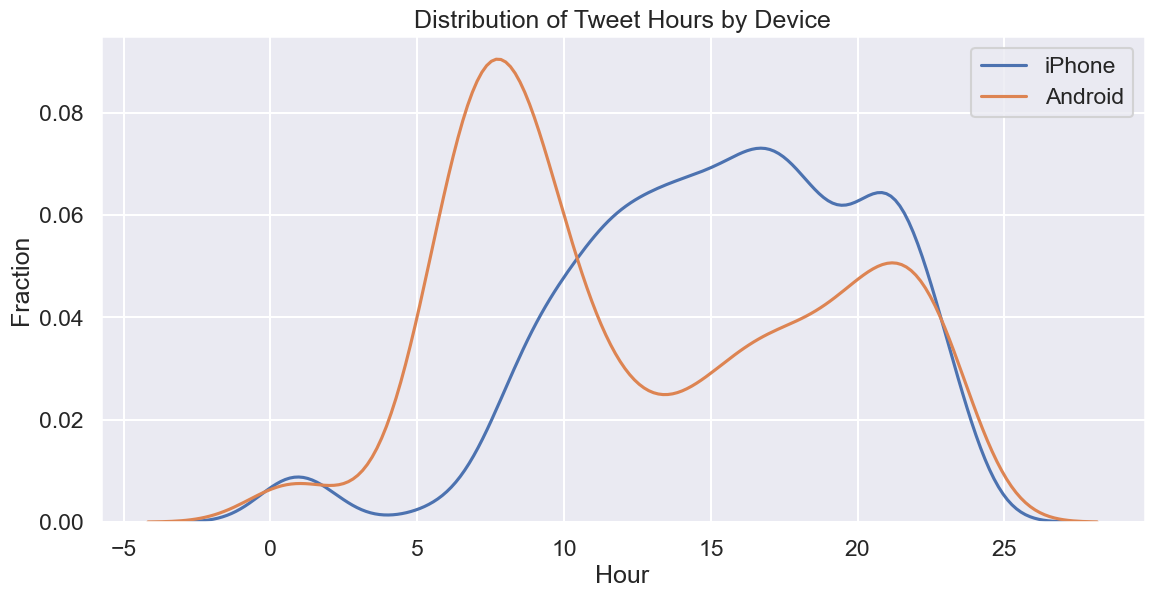

In [29]:
### BEGIN ANSWER
df_trump_2016 = df_trump[df_trump['est_time'].dt.year == 2016]

iphone_tweets_2016 = df_trump_2016[df_trump_2016['source'] == 'Twitter for iPhone']
android_tweets_2016 = df_trump_2016[df_trump_2016['source'] == 'Twitter for Android']

plt.figure(figsize=(12, 6))
sns.distplot(iphone_tweets_2016['hour'], label='iPhone', hist=False)
sns.distplot(android_tweets_2016['hour'], label='Android', hist=False)

plt.title('Distribution of Tweet Hours by Device')
plt.xlabel('Hour')
plt.ylabel('Fraction')
plt.legend()

plt.show()
### END ANSWER

### Task 3.6 Time of the day
* What time of the day the Android tweets were made by Trump himself? (eg: morning, late night etc). Just speculate based on data

The time of day at which the most Android tweets were made is 8 am. Trump tended to make personal tweets in the morning. 

* What time of the day the Android tweets were made by paid staff?

The time of day at which most of the iPhone tweets were made was 5 pm, but ranged from 12 pm to 8 pm. The distribution of iPhone tweets is far more symmetric and bell shaped than the Android tweets distributions, which has sharp peaks at 8 am and 9 pm. This is why I would suspect the the staff to be in charge of iPhone tweets. Howeber, if they were in charge of Android tweets, I would expect them to tweet at around 8 am or 9 pm.

### Task 3.7 Device Analysis
Let's now look at which device he has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years)

In [31]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

df_trump['year'] = df_trump['time'].apply(year_fraction) #should be df_trump

Use the `sns.distplot` to overlay the distributions of the 2 most frequently used web technologies over the years.  Your final plot should be similar to:

<img src="images/source_years.png" alt="Image" width="400" height="400" />

/Users/dinesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dinesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


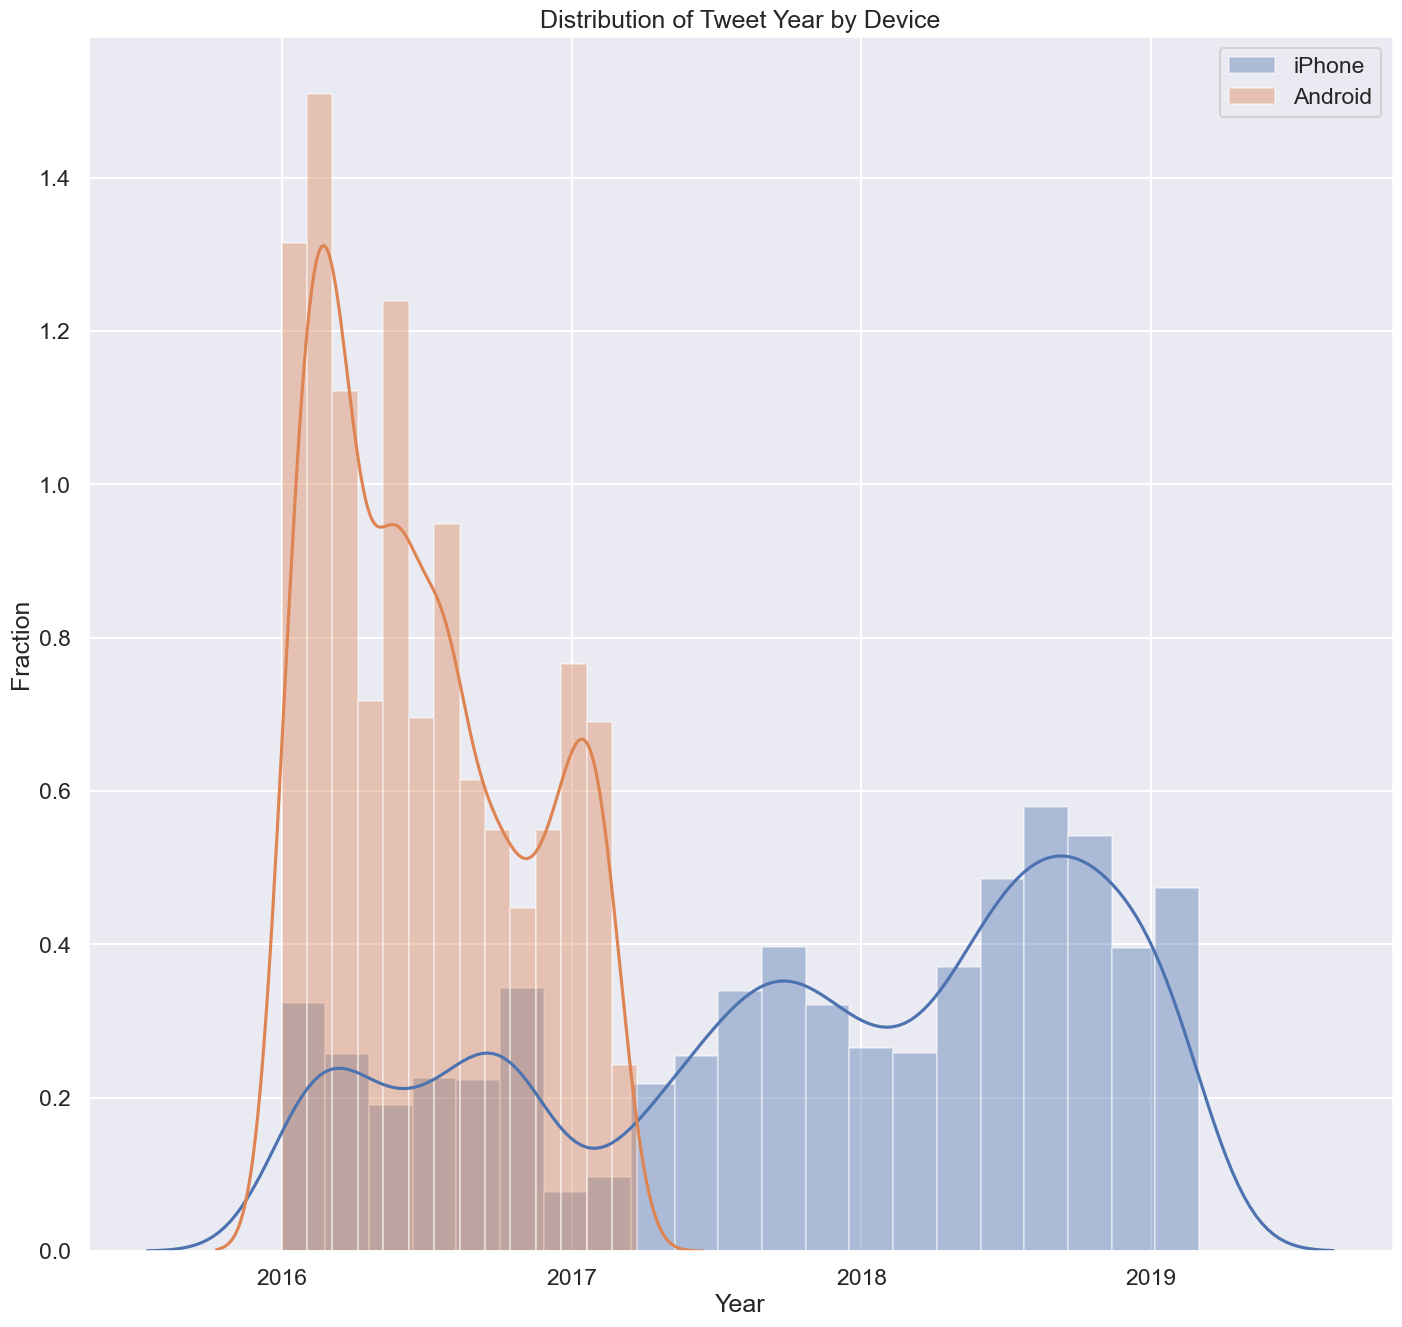

In [32]:
plt.figure(figsize=(15,15))
### BEGIN ANSWER
iphone_tweets_yr = df_trump[df_trump['source'] == 'Twitter for iPhone']
android_tweets_yr = df_trump[df_trump['source'] == 'Twitter for Android']

sns.distplot(iphone_tweets_yr['year'], label='iPhone', hist=True)
sns.distplot(android_tweets_yr['year'], label='Android', hist=True)

plt.title('Distribution of Tweet Year by Device')
plt.xlabel('Year')
plt.ylabel('Fraction')
plt.legend()

plt.show()
    # your solution here

### END ANSWER

## PART 4 - Sentiment Analysis  (group/individual)

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [34]:
print(''.join(open("vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



### Task 4.1 Polarities

As you can see, the lexicon contains emojis too! The first column of the lexicon is the *token*, or the word itself. The second column is the *polarity* of the word, or how positive / negative it is.

**Question** How did they decide the polarities of these words? What are the other two columns in the lexicon? (See the link above.)

 Read in the lexicon into a DataFrame called `df_sent`. The index of the DF should be the tokens in the lexicon. `df_sent` should have one column: `polarity`: The polarity of each token.

In [36]:
### BEGIN ANSWER
lexicon_file_path = 'vader_lexicon.txt'
# Read the lexicon file into a DataFrame with column names
df_sent = pd.read_csv(lexicon_file_path, header=None, names=['token', 'polarity', 'value1', 'value2'], sep='\t', engine='python')
df_sent = df_sent.set_index('token')
df_sent = df_sent[['polarity']]
# Display the DataFrame
print(df_sent.head())
# your solution here
### END ANSWER

       polarity
token          
$:         -1.5
%)         -0.4
%-)        -1.5
&-:        -0.4
&:         -0.7


### Task 4.2 Sentiment

Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

Be sure to lowercase the text in the tweets since the lexicon is also lowercase. Set the `text` column of the `df_trump` DF to be the lowercased text of each tweet.

In [37]:
### BEGIN ANSWER
df_trump['text'] = df_trump['text'].str.lower()
df_trump.head()
# your solution here

### END ANSWER

,time,source,text,retweet_count,favorite_count,est_time,hour,roundhour,year
id,,,,,,,,,
1052233253040640001,2018-10-16 16:22:11+00:00,Twitter for iPhone,register to https://t.co/0pwiwchgbh! #maga🇺🇸 https://t.co/actme53tzu,5415,16565,2018-10-16 11:22:11-05:00,11.369722,11.0,2018.789041
1052232230972678145,2018-10-16 16:18:08+00:00,Twitter for iPhone,rt @whitehouse: https://t.co/rnqlpots3o,4478,0,2018-10-16 11:18:08-05:00,11.302222,11.0,2018.789041
1052219253384994816,2018-10-16 15:26:33+00:00,Twitter for iPhone,"is it really possible that bruce ohr, whose wife nellie was paid by simpson and gps fusion for work done on the fake dossier, and who was used as a pawn in this whole scam (witch hunt), is still working for the department of justice????? can this really be so?????",13103,41253,2018-10-16 10:26:33-05:00,10.442500,10.0,2018.789041
1052217314463100928,2018-10-16 15:18:51+00:00,Twitter for iPhone,“conflict between glen simpson’s testimony to another house panel about his contact with justice department official bruce ohr. ohr was used by simpson and steele as a back channel to get (fake) dossier to fbi. simpson pleading fifth.” catherine herridge. where is jeff sessions?,6271,20251,2018-10-16 10:18:51-05:00,10.314167,10.0,2018.789041
1052213711295930368,2018-10-16 15:04:32+00:00,Twitter for iPhone,"“federal judge throws out stormy danials lawsuit versus trump. trump is entitled to full legal fees.” @foxnews great, now i can go after horseface and her 3rd rate lawyer in the great state of texas. she will confirm the letter she signed! she knows nothing about me, a total ...",14594,54635,2018-10-16 10:04:32-05:00,10.075556,10.0,2018.789041


### Task 4.3 punctuations

Now, let's get rid of punctuation since it'll cause us to fail to match words. Create a new column called `no_punc` in the `df_trump` to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be any character that isn't a Unicode word character or a whitespace character. You may want to consult the Python documentation on regexes for this problem.


In [38]:
# Save your regex in punct_re
punct_re = r'[^\w\s\\n]'
### BEGIN ANSWER
df_trump['no_punc'] = df_trump['text'].str.replace(punct_re, ' ', regex = True) 
df_trump.head()
# your solution here
### END ANSWER

,time,source,text,retweet_count,favorite_count,est_time,hour,roundhour,year,no_punc
id,,,,,,,,,,
1052233253040640001,2018-10-16 16:22:11+00:00,Twitter for iPhone,register to https://t.co/0pwiwchgbh! #maga🇺🇸 https://t.co/actme53tzu,5415,16565,2018-10-16 11:22:11-05:00,11.369722,11.0,2018.789041,register to https t co 0pwiwchgbh maga https t co actme53tzu
1052232230972678145,2018-10-16 16:18:08+00:00,Twitter for iPhone,rt @whitehouse: https://t.co/rnqlpots3o,4478,0,2018-10-16 11:18:08-05:00,11.302222,11.0,2018.789041,rt whitehouse https t co rnqlpots3o
1052219253384994816,2018-10-16 15:26:33+00:00,Twitter for iPhone,"is it really possible that bruce ohr, whose wife nellie was paid by simpson and gps fusion for work done on the fake dossier, and who was used as a pawn in this whole scam (witch hunt), is still working for the department of justice????? can this really be so?????",13103,41253,2018-10-16 10:26:33-05:00,10.442500,10.0,2018.789041,is it really possible that bruce ohr whose wife nellie was paid by simpson and gps fusion for work done on the fake dossier and who was used as a pawn in this whole scam witch hunt is still working for the department of justice can this really be so
1052217314463100928,2018-10-16 15:18:51+00:00,Twitter for iPhone,“conflict between glen simpson’s testimony to another house panel about his contact with justice department official bruce ohr. ohr was used by simpson and steele as a back channel to get (fake) dossier to fbi. simpson pleading fifth.” catherine herridge. where is jeff sessions?,6271,20251,2018-10-16 10:18:51-05:00,10.314167,10.0,2018.789041,conflict between glen simpson s testimony to another house panel about his contact with justice department official bruce ohr ohr was used by simpson and steele as a back channel to get fake dossier to fbi simpson pleading fifth catherine herridge where is jeff sessions
1052213711295930368,2018-10-16 15:04:32+00:00,Twitter for iPhone,"“federal judge throws out stormy danials lawsuit versus trump. trump is entitled to full legal fees.” @foxnews great, now i can go after horseface and her 3rd rate lawyer in the great state of texas. she will confirm the letter she signed! she knows nothing about me, a total ...",14594,54635,2018-10-16 10:04:32-05:00,10.075556,10.0,2018.789041,federal judge throws out stormy danials lawsuit versus trump trump is entitled to full legal fees foxnews great now i can go after horseface and her 3rd rate lawyer in the great state of texas she will confirm the letter she signed she knows nothing about me a total ...


**Question** Why don't we simply remove punctuation instead of replacing with a space? See if you can figure this out by looking at the tweet data.S

In my understanding, replacing the punctuation with a space rather instead of removing it is safer. It prevents the risk of connecting words that we do not mean to. For example, in a link such as 'https://t.co/0pwiwchgbh', when we remove punctuation the word becomes 'httpstco0pwiwchgbh', which can't really be analyzed for sentiment. To be fair, none of the words in the link make any sense or would have a strong polarity associated with it. However, there may be typos in tweets in which two separate words are connected only by some sort of punctuation, and nothing else. So, if we removed the punctuation instead of adding a space, the words would connect, making our analysis less accurate.

In [39]:
assert isinstance(punct_re, str)
assert re.search(punct_re, 'this') is None
assert re.search(punct_re, 'this is ok') is None
assert re.search(punct_re, 'this is\nok') is None
assert re.search(punct_re, 'this is not ok.') is not None
assert re.search(punct_re, 'this#is#ok') is not None
assert re.search(punct_re, 'this^is ok') is not None
assert df_trump['no_punc'].loc[800329364986626048] == 'i watched parts of  nbcsnl saturday night live last night  it is a totally one sided  biased show   nothing funny at all  equal time for us '
assert df_trump['text'].loc[884740553040175104] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'


### Task 4.4 Tidy Format


Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. Use the `no_punc` column of `df_trump` to create a table called `tidy_format`. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.

The first few rows of our `tidy_format` table look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>894661651760377856</th>
      <td>0</td>
      <td>i</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>1</td>
      <td>think</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>2</td>
      <td>senator</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>3</td>
      <td>blumenthal</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>4</td>
      <td>should</td>
    </tr>
  </tbody>
</table>

You can double check that your tweet with ID `894661651760377856` has the same rows as ours. Our tests don't check whether your table looks exactly like ours.

As usual, try to avoid using any for loops. Our solution uses a chain of 5 methods on the 'trump' DF, albeit using some rather advanced Pandas hacking.

* **Hint 1:** Try looking at the `expand` argument to pandas' `str.split`.

* **Hint 2:** Try looking at the `stack()` method.

* **Hint 3:** Try looking at the `level` parameter of the `reset_index` method.

In [40]:
#tidy_format = ...
tidy_format = (
    df_trump['no_punc']
    .str.split(expand=True)
    .stack()
    .reset_index(level=1)
    .rename(columns={0: 'word', 'level_1': 'num'})
    .reset_index()
)
tidy_format.set_index('id', inplace=True)

# Display the first few rows of the tidy_format table
print(tidy_format.head())

print(tidy_format.loc[894661651760377856])
### BEGIN ANSWER
   
# your solution here

### END ANSWER

                     num      word
id                                
1052233253040640001    0  register
1052233253040640001    1        to
1052233253040640001    2     https
1052233253040640001    3         t
1052233253040640001    4        co
                    num        word
id                                 
894661651760377856    0           i
894661651760377856    1       think
894661651760377856    2     senator
894661651760377856    3  blumenthal
894661651760377856    4      should
894661651760377856    5        take
894661651760377856    6           a
894661651760377856    7        nice
894661651760377856    8        long
894661651760377856    9    vacation
894661651760377856   10          in
894661651760377856   11     vietnam
894661651760377856   12       where
894661651760377856   13          he
894661651760377856   14        lied
894661651760377856   15       about
894661651760377856   16         his
894661651760377856   17     service
894661651760377856   18          so

In [41]:
assert tidy_format.loc[894661651760377856].shape == (27, 2)
assert ' '.join(list(tidy_format.loc[894661651760377856]['word'])) == 'i think senator blumenthal should take a nice long vacation in vietnam where he lied about his service so he can at least say he was there'

### Task 4.5 Polrity Column

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `df_trump` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.

**Hint** you will need to merge the `tidy_format` and `df_sent` tables and group the final answer.


In [42]:
#df_trump['polarity'] = ...
df_trump = df_trump[['time', 'source', 'text', 'retweet_count', 'favorite_count', 'est_time', 'hour', 'roundhour', 'year', 'no_punc']]
### BEGIN ANSWER
merged_df = tidy_format.merge(df_sent, left_on='word', right_index=True, how='left')
merged_df['polarity'] = merged_df['polarity'].fillna(0)
grouped_df = merged_df.groupby('id')['polarity'].sum().reset_index()
grouped_df.set_index('id', inplace=True)
df_trump = df_trump.merge(grouped_df, left_on='id', right_index=True, how='left')
# your solution here
### END ANSWER
#df_trump

In [43]:
assert np.allclose(df_trump.loc[744701872456536064, 'polarity'], 8.4)
assert np.allclose(df_trump.loc[745304731346702336, 'polarity'], 2.5)
assert np.allclose(df_trump.loc[744519497764184064, 'polarity'], 1.7)
assert np.allclose(df_trump.loc[894661651760377856, 'polarity'], 0.2)
assert np.allclose(df_trump.loc[894620077634592769, 'polarity'], 5.4)
# If you fail this test, you dropped tweets with 0 polarity
assert np.allclose(df_trump.loc[744355251365511169, 'polarity'], 0.0)


### Task 4.6 Most Positive and Negative Tweets
Now we have a measure of the sentiment of each of his tweets! You can read over the VADER readme to understand a more robust sentiment analysis.
Now, write the code to see the 20 most positive and most 20 negative tweets from Trump in your dataset:
Find the most negative and most positive tweets made by Trump

In [44]:
print('Most negative tweets:')

### BEGIN ANSWER
most_negative_tweets = df_trump.nsmallest(20, 'polarity')[['text', 'polarity']]
most_negative_tweets
# your solution here

### END ANSWER

Most negative tweets:


,text,polarity
id,,
1084649448003784704,"the trump portrait of an unsustainable border crisis is dead on. “in the last two years, ice officers made 266,000 arrests of aliens with criminal records, including those charged or convicted of 100,000 assaults, 30,000 sex crimes &amp; 4000 violent killings.” america’s sout...",-20.4
1031590431379865600,"it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!",-20.3
1029731513573822464,"the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!",-16.6
1056299897882923009,...this evil anti-semitic attack is an assault on humanity. it will take all of us working together to extract the poison of anti-semitism from our world. we must unite to conquer hate.,-16.1
984763579210633216,"james comey is a proven leaker &amp; liar. virtually everyone in washington thought he should be fired for the terrible job he did-until he was, in fact, fired. he leaked classified information, for which he should be prosecuted. he lied to congress under oath. he is a weak a...",-16.0
1074319076766433280,"at the request of many, i will be reviewing the case of a “u.s. military hero,” major matt golsteyn, who is charged with murder. he could face the death penalty from our own government after he admitted to killing a terrorist bomb maker while overseas. @petehegseth @foxnews",-15.7
1070314629732163586,".....considered to be the worst and most dangerous, addictive and deadly substance of them all. last year over 77,000 people died from fentanyl. if china cracks down on this “horror drug,” using the death penalty for distributors and pushers, the results will be incredible!",-15.4
1027585937163931648,"this is an illegally brought rigged witch hunt run by people who are totally corrupt and/or conflicted. it was started and paid for by crooked hillary and the democrats. phony dossier, fisa disgrace and so many lying and dishonest people already fired. 17 angry dems? stay tuned!",-15.2
1031508193107763200,"where’s the collusion? they made up a phony crime called collusion, and when there was no collusion they say there was obstruction (of a phony crime that never existed). if you fight back or say anything bad about the rigged witch hunt, they scream obstruction!",-15.0


In [45]:
print('Most positive tweets:')

### BEGIN ANSWER
most_positive_tweets = df_trump.nlargest(20, 'polarity')[['text', 'polarity']]
most_positive_tweets
# your solution here

### END ANSWER

Most positive tweets:


,text,polarity
id,,
983143317889323008,"congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!",26.5
1082648785312976896,"congratulations to a truly great football team, the clemson tigers, on an incredible win last night against a powerful alabama team. a big win also for the great state of south carolina. look forward to seeing the team, and their brilliant coach, for the second time at the w.h.",21.2
1007974129474121728,"my supporters are the smartest, strongest, most hard working and most loyal that we have seen in our countries history. it is a beautiful thing to watch as we win elections and gather support from all over the country. as we get stronger, so does our country. best numbers ever!",20.7
1016638035281219584,"thank you to all of my great supporters, really big progress being made. other countries wanting to fix crazy trade deals. economy is roaring. supreme court pick getting great reviews. new poll says trump, at over 90%, is the most popular republican in history of the party. wow!",18.9
973716838889660416,"it was my great honor to deliver a message at the marine corps air station miramar to our great u.s. military, straight from the heart of the american people: we support you, we thank you, we love you - and we will always have your back! https://t.co/oct1nh3don",18.9
1014287566386888709,"thank you, @wvgovernor jim justice, for that warm introduction. tonight, it was my great honor to attend the “greenbrier classic – salute to service dinner” in west virginia! god bless our veterans. god bless america - and happy independence day to all! https://t.co/v35qvcn8m6",18.6
994176238846664706,"the republican party had a great night. tremendous voter energy and excitement, and all candidates are those who have a great chance of winning in november. the economy is sooo strong, and with nancy pelosi wanting to end the big tax cuts and raise taxes, why wouldn’t we win?",18.5
1068826073775964160,"president george h.w. bush led a long, successful and beautiful life. whenever i was with him i saw his absolute joy for life and true pride in his family. his accomplishments were great from beginning to end. he was a truly wonderful man and will be missed by all!",18.2
819541997325316096,thank you to linda bean of l.l.bean for your great support and courage. people will support you even more now. buy l.l.bean. @lbperfectmaine,18.2


### Task 4.7  NYT vs FOX
Plot the distribution of tweet sentiments broken down by whether the text of the tweet contains `nyt` or `fox`.  Then in the box below comment on what we observe?

<img src="images/nyt_vs_fox.png" alt="Image" width="500" height="900" />

/Users/dinesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dinesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


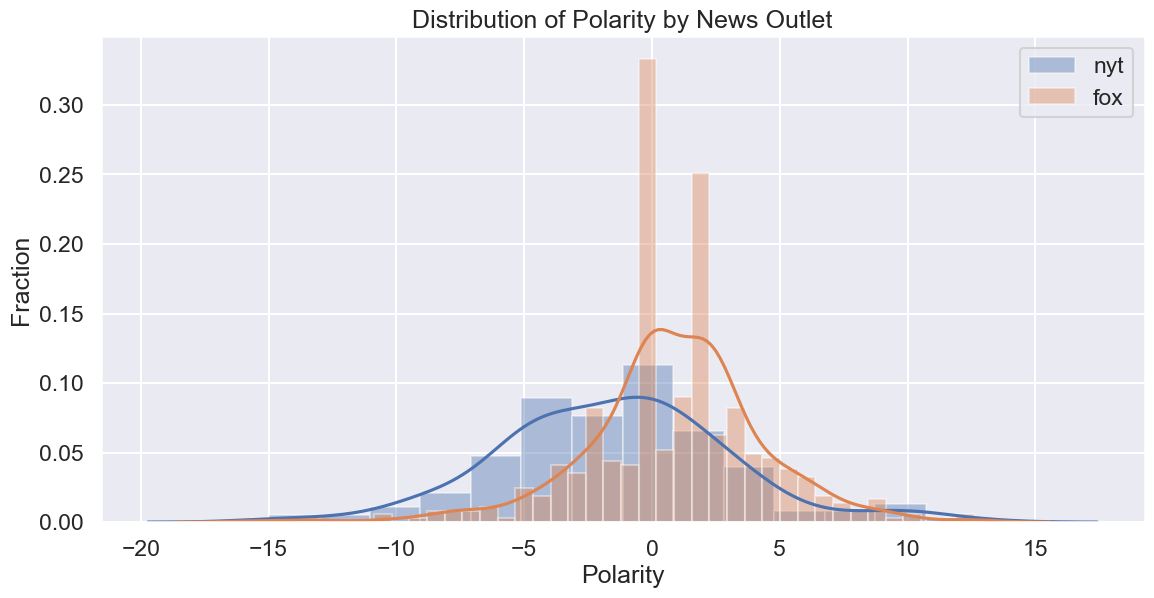

In [46]:
### BEGIN ANSWER
nyt_tweets = df_trump[df_trump['text'].str.contains('nyt', case=False)]
fox_tweets = df_trump[df_trump['text'].str.contains('fox', case=False)]

plt.figure(figsize=(12, 6))

sns.distplot(nyt_tweets['polarity'], label='nyt', hist=True)
sns.distplot(fox_tweets['polarity'], label='fox', hist=True)

plt.title('Distribution of Polarity by News Outlet')
plt.xlabel('Polarity')
plt.ylabel('Fraction')
plt.legend()

plt.show()
# your solution here

### END ANSWER

##### Comment on what you observe:

Fox has a higher proportion of neutral and positive tweets, whereas NYT has a higher proportion of negative tweets. According to this distribution, Fox generally has more positive tweets, whereas NYT has more neutral/slightly negative tweets. The NYT distribution is also very wide, which suggests more extreme positive and negative tweets. Fox, on the other hand, has a narrower distribution, which suggests less extreme tweets. However, when filtering the dataset to get the NYT tweets, the filtering included anything with 'nyt' including the word 'anything', so this might have made the results less reliable. Less words include the substring 'fox'.

## PART 5 - Principal Component Analysis (PCA) and Twitter  (group and individual)
A look at the top words used and the sentiments expressed in Trump tweets indicates that, some words are used with others almost all the time. A notable example is the slogan like **Make America Great Again**. As such, it may be beneficial to look at groups of words rather than individual words. For that, we will look at an approach applying a Principal Component Analysis. 

### The PCA
The Principal Component Analysis, or PCA, is a tool generally used to identify patterns and to reduce the number of variables you have to consider in your analysis. For example, if you have data with 200 columns, it may be that a significant amount of the variance in your data can be explained by just 100 principal components. In the PCA, the first component is chosen in such a way that has the largest variance, subsequent components are orthogonal and continue covering as much variance as possible. In this way, the PCA samples as much of the variability in the data set with the first few components. Mathematically, each component is a linear combination of all the input parameters times coefficients specific for that component. These coefficients, or loading factors, are constrained such that the sum of the squares of them are equal to 1. As such, the loading factors serve as weights describing how strongly certain parameters contribute to the specific principal component. Parameters with large values of positive or negative loading factors are correlated with each other, which can serve to identify trends in your data.

### Task 5.1 Cleaning up the Data
Using NLTK (Natural Language Toolkit) package for language processing and other python libraries, parse the json file to deal with inflected words, such as plurals, and removed stop words like common English words (the, and, it, etc) and certain political terms (the candidates names, for example). You can start with the top 50 words, but full analysis may require large number of words.
Create a document-frequecy (df) matrix with 5000 rows and 50 columns where each column is a particular word (feature) and each row is a tweet (observation). The values of the matrix is how often the word appears. Apply the techniques we learned to reduce the weight of most common words (if necessary). Since this is a sparse matrix, you can use the sparse martix libraries to make things a bit more efficient (we can also use a regular numpy arrays to store these things since the dimensions are not too large). See demo notes books and lecture slides for some sparse matrix methods.
Print the first 10 rows of the df to show the matrix you created

Start with the `tidy_format` dataframe

In [47]:
### BEGIN ANSWER
## code to plot the first 10 rows of the matrix
# import nltk
# import nltk.corpus
# nltk.download('stopwords')
# nltk.download('wordnet')
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import *
nltk.download('omw-1.4')
nltk.download('wordnet')
### END ANSWER


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dinesh/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /Users/dinesh/nltk_data...
[nltk_data] Downloading package wordnet to /Users/dinesh/nltk_data...


True

In [48]:
tmp = df_trump['text'][:5000]
tmp = tidy_format

# remove stopwords
tmp = tmp[~tmp['word'].isin(nltk.corpus.stopwords.words('english'))]
other = ['rt', 't', 'co', 'https', 'realdonaldtrump', 'amp', 'u', 'hillary', 'trump2016', 'trump', 'clinton', 'http', 'ha', 'wa']
tmp = tmp[~tmp['word'].isin(other)]

# deal with plurals
lemmatizer = WordNetLemmatizer()
tmp['word'] = tmp['word'].apply(lambda x: lemmatizer.lemmatize(x))

# Remove numbers
tmp = tmp[~tmp['word'].str.isnumeric()]

# Remove words with only 1 or 2 length
tmp = tmp[tmp['word'].apply(lambda x: len(x) > 2)]

top_50 = tmp['word'].value_counts()[:50]
print(top_50)

top_50_edited = tmp[tmp['word'].isin(top_50.reset_index()['index'])]
ids = top_50_edited.index.sort_values()

frequencymx = np.zeros((5000,50))
top_50 = top_50.reset_index()
for i in range(5000):
    for j in range(50):
        if (top_50['index'][j]) in df_trump['no_punc'].loc[ids[i]]:
            frequencymx[i][j] += 1

great                    2065
thank                    1108
people                   1041
country                   785
president                 780
america                   718
job                       683
get                       632
big                       632
time                      627
border                    600
state                     595
year                      594
new                       588
today                     581
news                      578
many                      575
make                      556
democrat                  554
vote                      544
american                  541
want                      485
fake                      473
would                     466
much                      421
never                     421
republican                420
one                       415
medium                    398
tax                       394
back                      388
good                      385
going                     379
day       

    ### Task 5.2 Find the PCA's
Write the code to find the first 50 PCA's for the document-frequency matrix. Pass the document-term-matrix to scikit-learn’s (https://scikit-learn.org/stable/modules/decomposition.html#decompositions) PCA method to obtain the components and loading factors.

In [51]:
### BEGIN ANSWER
!pip install scikit-learn
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(frequencymx)

components = pca.components_

# your solution here

### END ANSWER

### Task 5.3 Examine the PCA
We can examine the PCA results to look at the heatmap. Make a grid plot which shows the various principal component along the x-axis and the individual words along the y-axes. Each grid box should be color-coded based on the sign of the loading factor and how large the square of that value is. Looking at it vertically, you can see which words constitute your principal components. Looking at it horizontally, you can see how individual terms are shared between components. Your answer will look closer to this.

<img src="images/pca.png" alt="Image" width="900" height="900" />

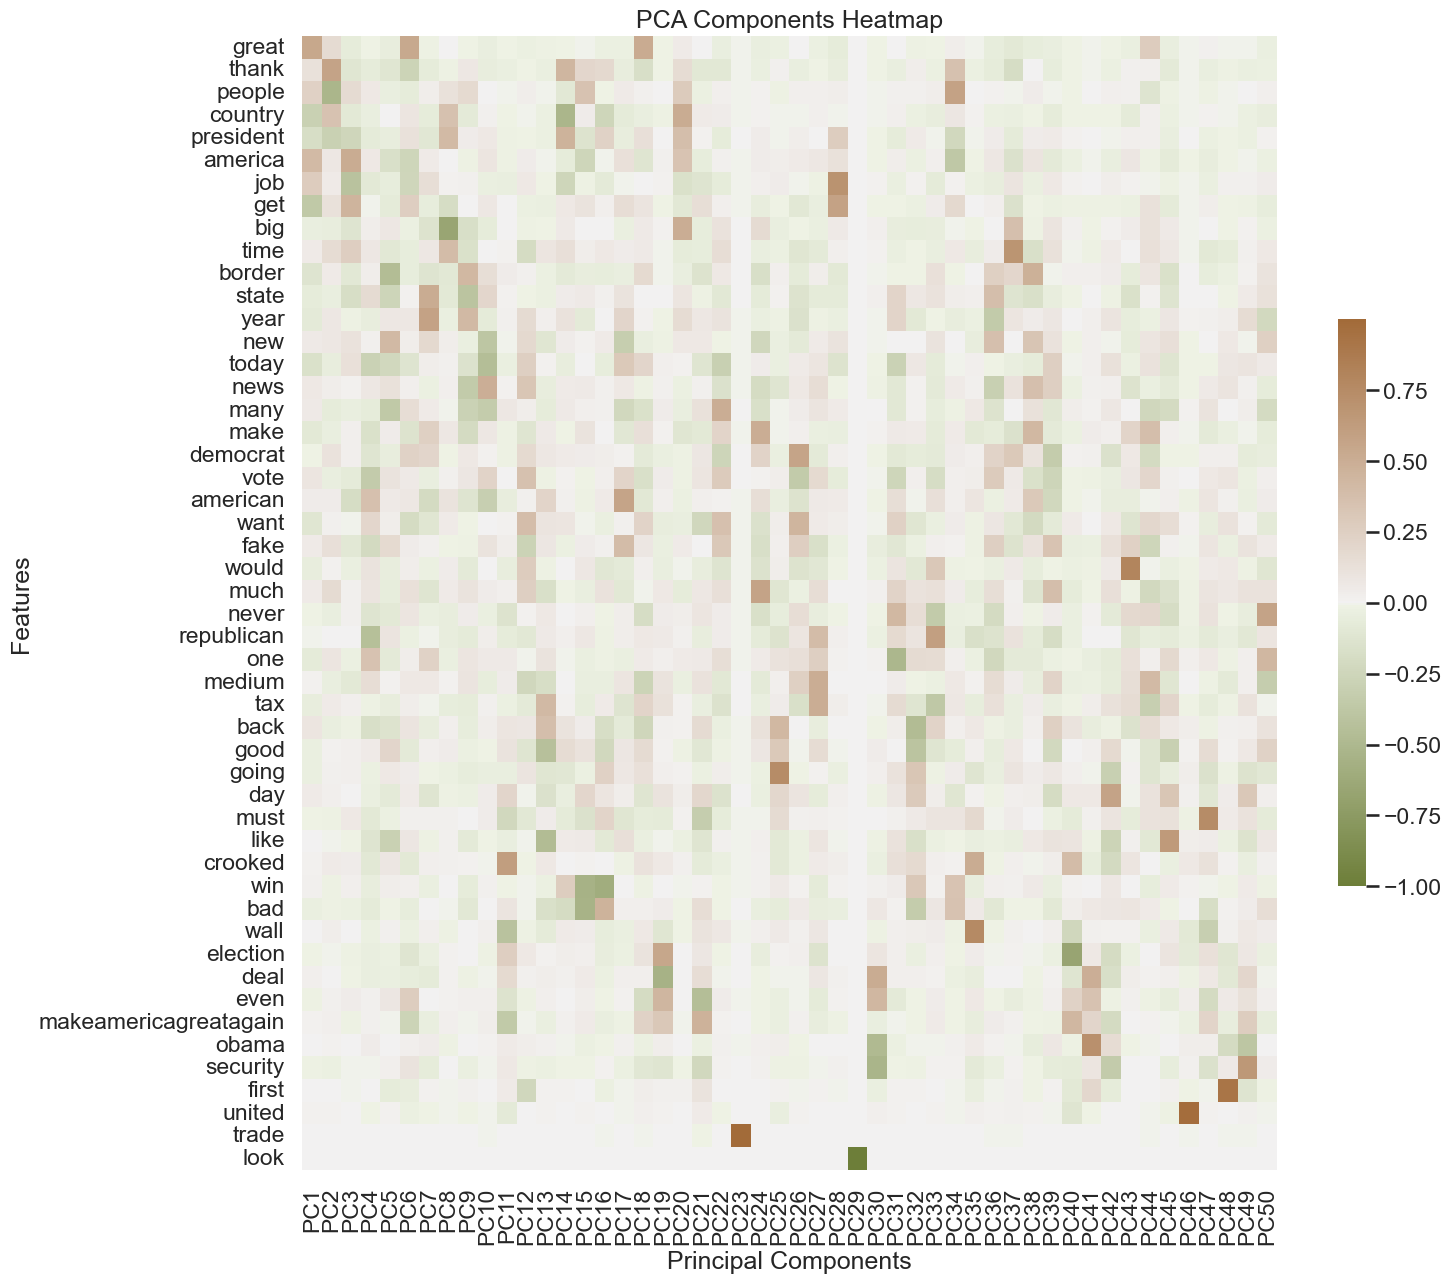

In [52]:
### BEGIN ANSWER
pca_labels = ['PC{}'.format(i) for i in range(1, 51)]
plt.figure(figsize=(14, 14))
cmap = sns.diverging_palette(100, 400, as_cmap=True)
sns.heatmap(components, cmap=cmap, yticklabels=top_50['index'], xticklabels=pca_labels, annot=False, fmt=".2f", cbar_kws={"shrink": 0.5})
plt.title('PCA Components Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()

# your solution here

### END ANSWER

### Task 5.4 PCA Compare
We can determine how many words and how many components are needed to do a good visualization. Plot PC1 and PC2 in a 2D plot. The results should be similar to following scatter plot 

![title](images/PC1_PC2.png)

This is a scatter plot of the values of the components, but with arrows indicating some of the prominent terms as indicated by their loading factors. The values of the loading factors are used to determine the length and direction of these arrows and as such they serve as a way of expressing direction. That is, tweets which use these terms will be moved along the length of those arrows. Shown are the most important parameters.

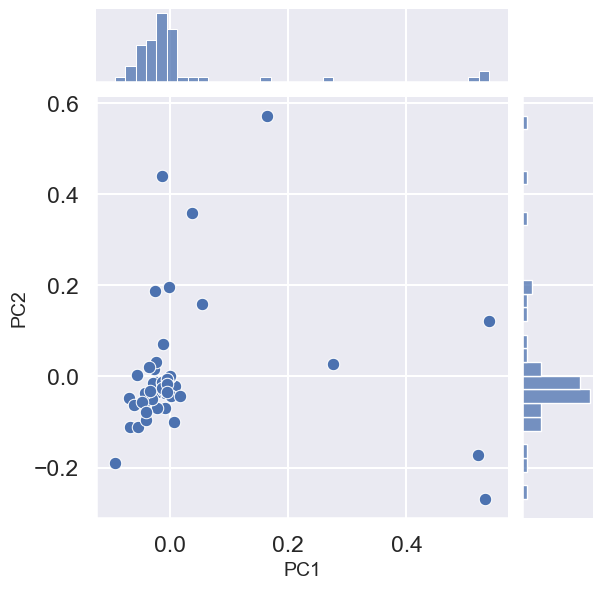

In [53]:
### BEGIN ANSWER
pca_x = components[0]
pca_y = components[1]
fig = sns.jointplot(x=pca_x, y=pca_y)
fig.set_axis_labels('PC1', 'PC2', fontsize=14)
# your solution here

### END ANSWER

Created by Andy Gunawardena @2023 Credits: Josh Hug, and Berkeley Data Science Group, Steve Skiena, David Rodreguez

@ Copyrighted Material. DO NOT post online.